In [1]:
import os
import pandas as pd
import warnings
#import matplotlib.pyplot as plt
import sys
import numpy as np
#import seaborn as sns

from tqdm import tqdm
#from random import randint
#from sklearn.model_selection import train_test_split
import time
#import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 15

In [3]:
time_counter = time.time_ns()

df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)


process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.92it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.94it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.86it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.11it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 18.98it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 822.96it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 531.30it/s]


Reformat...


100%|███████████████████████████████████████████████████████████████████████████████| 765/765 [00:03<00:00, 219.94it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 120.10it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 39.31it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 96.10it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 10.89it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.16it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.19it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.43it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 992.61it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.06it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 32.18it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.43it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 40.31it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 28.60it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.85it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.80it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 889.29it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 979.25it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 868.29it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 99.31it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 51.82it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 77.83it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 101.17it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 294.41it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 702.09it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 509.17it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 306.21it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 882.96it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 836.45it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 825.06it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 996.08it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 843.67it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 518.40it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 611.31it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 543.04it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 670.40it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 288.83it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 262.70it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|███████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 258.42it/s]


Reformat...


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:10<00:00, 538.25it/s]


Dataset generation took : 247.0618177 s


In [4]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,2592,0,52176,40096,80224,80112,328,0,0,0,...,0,0,0,0,0,0,0,0,0,messenger
20221117_125310_4_15,0,0,0,392,584,5712,0,0,0,0,...,0,0,0,0,0,0,0,33688,0,messenger
20221117_125310_4_30,27912,8168,2752,2136,704,4984,0,0,24680,712,...,37808,103528,12848,77000,98288,81672,114152,74864,88160,messenger
20221117_125310_4_45,0,0,296,0,2928,7048,0,0,0,0,...,103776,141800,136000,116848,166688,188968,160760,231240,159472,messenger
20221117_125310_4_60,752,0,0,3368,880,7888,0,0,0,0,...,126152,129480,122120,104160,152944,171560,162064,160912,139248,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_150,64944,0,0,0,0,0,0,45912,8592,0,...,41840,0,0,0,0,0,0,0,0,youtube
20230124_124323_166_0,50648,24152,0,0,7552,0,0,0,0,2376,...,0,0,211000,87496,0,0,0,880152,0,youtube
20230124_124323_166_15,0,0,0,0,0,0,41896,51864,0,0,...,4496,64776,143632,0,0,0,0,0,177632,youtube
20230124_124323_166_30,26952,58424,0,0,0,0,8704,0,0,7744,...,448,0,3696,2152,896,200032,0,0,7440,youtube


In [5]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.440219,-1.464162,-1.027412,-1.132250,-0.798491,-0.796031,-1.453737,-1.462331,-1.460802,-1.454915,...,-0.757158,-0.775148,-0.808439,-0.794229,-0.725009,-0.766878,-0.794605,-0.840514,-0.823655,messenger
20221117_125310_4_15,-1.461623,-1.464162,-1.459074,-1.460388,-1.456448,-1.407449,-1.456438,-1.462331,-1.460802,-1.454915,...,-0.757158,-0.775148,-0.808439,-0.794229,-0.725009,-0.766878,-0.794605,-0.720319,-0.823655,messenger
20221117_125310_4_30,-1.231125,-1.396584,-1.436306,-1.445975,-1.455456,-1.413432,-1.456438,-1.462331,-1.257041,-1.449058,...,-0.638895,-0.441109,-0.764811,-0.539917,-0.427175,-0.508504,-0.416049,-0.573408,-0.515073,messenger
20221117_125310_4_45,-1.461623,-1.464162,-1.456625,-1.463628,-1.437082,-1.396470,-1.456438,-1.462331,-1.460802,-1.454915,...,-0.432550,-0.317622,-0.346621,-0.408309,-0.219908,-0.169066,-0.261486,-0.015478,-0.265463,messenger
20221117_125310_4_60,-1.455413,-1.464162,-1.459074,-1.435793,-1.454002,-1.389567,-1.456438,-1.462331,-1.460802,-1.454915,...,-0.362558,-0.357373,-0.393754,-0.450215,-0.261556,-0.224138,-0.257161,-0.266400,-0.336252,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_150,-0.925314,-1.464162,-1.459074,-1.463628,-1.461272,-1.454390,-1.456438,-1.082581,-1.389865,-1.454915,...,-0.626283,-0.775148,-0.808439,-0.794229,-0.725009,-0.766878,-0.794605,-0.840514,-0.823655,youtube
20230124_124323_166_0,-1.043371,-1.264340,-1.459074,-1.463628,-1.398881,-1.454390,-1.456438,-1.462331,-1.460802,-1.435371,...,-0.757158,-0.775148,-0.091942,-0.505252,-0.725009,-0.766878,-0.794605,2.299760,-0.823655,youtube
20230124_124323_166_15,-1.461623,-1.464162,-1.459074,-1.463628,-1.461272,-1.454390,-1.111494,-1.033350,-1.460802,-1.454915,...,-0.743094,-0.566144,-0.320705,-0.794229,-0.725009,-0.766878,-0.794605,-0.840514,-0.201898,youtube


In [6]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [7]:
# Train + Evaluate

In [8]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 32.766091 s for a dataset length of 23565


In [9]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.2454806 s for a dataset length of 10068
Testing Duration per data : 0.024382260627731425 ms


normalized confusion matrix


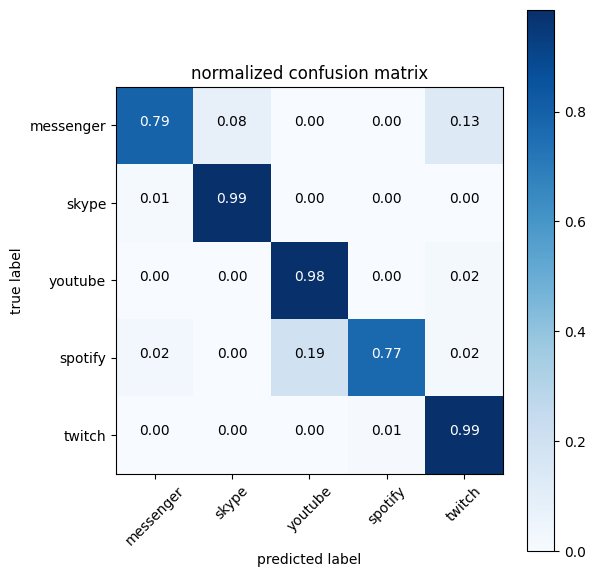

In [10]:
plot_confusion_matrix(true_labels,preds_labels)

In [11]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.9021908571876341,
 'Precision': 0.9138451357655423,
 'Recall': 0.844259038537942,
 'F1_Score': 0.8598957239845085,
 'support': None}

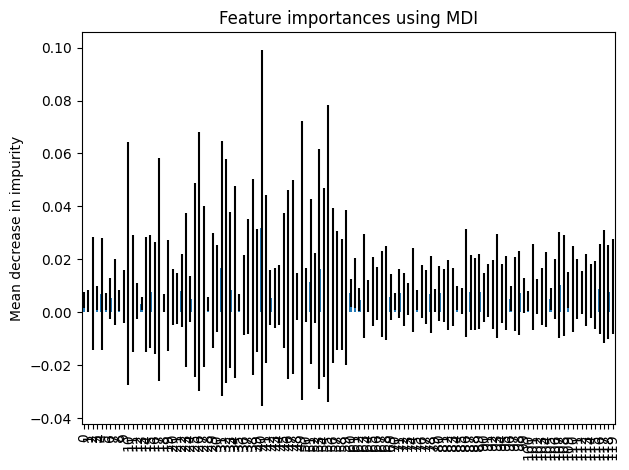

In [12]:
plot_feature_importance(model, training_data.columns[:-1])